In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.pipeline import Pipeline, FeatureUnion

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Sales & Marketing Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,interest_in_discount_program,training_ID,trainer_name,training_total_meetings,training_price,discount_training,training_type,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,5,...,5,B0001,Ibun,17,5500000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Advanced Digital Marketing & Foundation,Sales Forecasting: for Sales Target Results
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,5,...,5,B0002,Reza,17,4800000.0,60,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,5,...,5,B0003,Ibun,14,6000000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,5,...,5,B0004,Reza,17,6000000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,5,B0005,Haris,17,6000000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   5000 non-null   int64  
 1   company_ID                                   5000 non-null   object 
 2   company_name                                 5000 non-null   object 
 3   company_pic                                  5000 non-null   object 
 4   company_address                              5000 non-null   object 
 5   company_phone                                5000 non-null   object 
 6   company_email                                5000 non-null   object 
 7   company_field                                5000 non-null   object 
 8   transaction_date                             5000 non-null   object 
 9   level_training_process                       5000 non-null   int64  
 10  

In [4]:
df.drop([
    "Unnamed: 0", "company_ID", "company_name", "company_pic", "company_address", "company_phone", "company_email",
    "transaction_date", "training_ID", "training_type", "possibility_of_purchasing_the_same_training",
    "tren_mode_factor", "purchasing_time_patterns"
], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   company_field                 5000 non-null   object 
 1   level_training_process        5000 non-null   int64  
 2   number_of_participants        5000 non-null   int64  
 3   group                         5000 non-null   object 
 4   total_payment                 5000 non-null   float64
 5   satisfaction                  5000 non-null   int64  
 6   communication_channel         5000 non-null   object 
 7   complaints                    5000 non-null   object 
 8   communication_quality         5000 non-null   object 
 9   frequency_engagement          5000 non-null   int64  
 10  brand_sustainability          5000 non-null   int64  
 11  rating_training               5000 non-null   int64  
 12  interest_in_discount_program  5000 non-null   int64  
 13  tra

In [5]:
columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object" :
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])
             
scaler = MinMaxScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,level_training_process,number_of_participants,total_payment,satisfaction,frequency_engagement,brand_sustainability,rating_training,interest_in_discount_program,training_total_meetings,training_price,discount_training,company_field,group,communication_channel,complaints,communication_quality,trainer_name,training_name,cross_selling,upselling
0,1.0,0.684211,0.914566,1.0,1.0,0.111111,1.00,1.0,1.000000,0.600000,0.833333,4,0,2,2,0,3,6,0,6
1,1.0,0.736842,0.712943,1.0,1.0,0.111111,1.00,1.0,1.000000,0.435294,1.000000,1,0,2,2,0,6,6,3,6
2,1.0,0.526316,0.897480,1.0,1.0,0.111111,0.75,1.0,0.727273,0.717647,0.833333,14,0,2,2,0,3,6,3,6
3,1.0,1.000000,0.948740,1.0,1.0,0.000000,1.00,1.0,1.000000,0.717647,0.833333,12,0,2,2,0,6,6,3,6
4,1.0,0.842105,0.897480,1.0,1.0,0.000000,1.00,1.0,1.000000,0.717647,0.833333,10,0,2,2,0,2,6,3,6


In [6]:
X = df2.drop("cross_selling", axis=1)
y = df2["cross_selling"]

pca = PCA()
pca.fit(X)

PCA()

In [7]:
# Tentukan jumlah principal component yang optimal
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(var_exp, cum_var_exp)

[6.81966223e-01 1.38096375e-01 6.58937358e-02 5.90426223e-02
 3.43877382e-02 8.75624766e-03 4.16459265e-03 3.54344284e-03
 1.91833574e-03 9.11643784e-04 2.72105177e-04 2.50616467e-04
 2.28474943e-04 1.95853893e-04 1.73126531e-04 1.02366853e-04
 4.94028264e-05 3.21560434e-05 1.49403448e-05] [0.68196622 0.8200626  0.88595633 0.94499896 0.97938669 0.98814294
 0.99230753 0.99585098 0.99776931 0.99868096 0.99895306 0.99920368
 0.99943215 0.99962801 0.99980113 0.9999035  0.9999529  0.99998506
 1.        ]


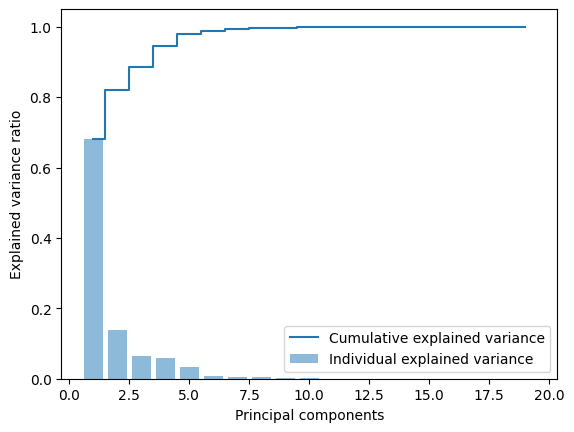

In [8]:
# Tampilkan visualisasi dari hasil PCA dengan warna yang berbeda untuk masing-masing principal component
plt.bar(range(1, len(cum_var_exp)+1), var_exp, alpha=0.5, align="center", label="Individual explained variance")
plt.step(range(1, len(cum_var_exp)+1), cum_var_exp, where="mid", label="Cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc="best")
plt.show()

In [9]:
# Mengambil komponen utama yang paling penting (misalnya, dua komponen pertama)
features = np.array(X.columns)
n_top_components = 10
top_component_indices = np.argsort(np.abs(pca.components_))[:, -n_top_components:]

# Mengambil nama fitur-fitur yang paling penting
top_feature_names = [features[i] for i in top_component_indices]

print("Fitur-fitur yang paling penting:")
for i, feature_set in enumerate(top_feature_names):
    print(f"Komponen Utama {i + 1}: {', '.join(feature_set)}")

Fitur-fitur yang paling penting:
Komponen Utama 1: brand_sustainability, total_payment, discount_training, interest_in_discount_program, frequency_engagement, communication_channel, communication_quality, training_name, trainer_name, company_field
Komponen Utama 2: brand_sustainability, level_training_process, group, total_payment, interest_in_discount_program, training_price, complaints, communication_channel, upselling, training_name
Komponen Utama 3: brand_sustainability, level_training_process, group, complaints, communication_channel, communication_quality, company_field, training_name, upselling, trainer_name
Komponen Utama 4: total_payment, communication_channel, brand_sustainability, group, level_training_process, satisfaction, trainer_name, communication_quality, upselling, training_name
Komponen Utama 5: total_payment, interest_in_discount_program, satisfaction, level_training_process, frequency_engagement, brand_sustainability, group, communication_quality, communication_cha

In [10]:
# Temukan jumlah komponen utama yang menjelaskan sebagian besar varians
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.98) + 1
print(f'Jumlah komponen utama yang menjelaskan 98% varians: {n_components}')

Jumlah komponen utama yang menjelaskan 98% varians: 6


In [11]:
features = np.array(X.columns)
select = SelectKBest(score_func=f_regression, k=10)
z = select.fit_transform(X, y) 

In [12]:
filterr = select.get_support()
features[filterr]

array(['level_training_process', 'total_payment', 'frequency_engagement',
       'interest_in_discount_program', 'training_price',
       'discount_training', 'group', 'communication_channel',
       'training_name', 'upselling'], dtype=object)

In [13]:
num_features_to_select = 10
# Buat instance PCA
pca = PCA(n_components=num_features_to_select)

# Buat instance SelectKBest dengan uji statistik f_classif (sesuaikan dengan tipe data dan masalah Anda)
select_k_best = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Gabungkan keduanya dalam pipeline
combined_features = FeatureUnion([("pca", pca), ("select_k_best", select_k_best)])

# Buat model akhir (misalnya, classifier) setelah pemilihan fitur
# Di sini, kita tidak menambahkan classifier karena fokus pada pemilihan fitur
# Anda dapat menambahkan classifier sesuai kebutuhan

# Buat pipeline yang menggabungkan seleksi fitur dan model akhir
pipeline = Pipeline([("features", combined_features)])

X_new = pipeline.fit_transform(X, y)

In [14]:
# Setelah Anda memiliki pipeline yang sudah di-fit dan transform (seperti di atas)
# Dapatkan indeks fitur-fitur terbaik dari objek SelectKBest
feature_indices = select_k_best.get_support(indices=True)

# Ambil nama fitur dari dataset asli (misalnya, iris dataset)
selected_feature_names = [features[i] for i in feature_indices]

# Cetak nama-nama fitur yang dipilih
print("Fitur yang dipilih:")
for i, j in enumerate(selected_feature_names):
    print(i+1, j)

Fitur yang dipilih:
1 level_training_process
2 total_payment
3 satisfaction
4 frequency_engagement
5 brand_sustainability
6 interest_in_discount_program
7 training_price
8 discount_training
9 group
10 complaints


In [15]:
for i in columns:
    if i in df.columns:
        df2[i] = columns[i].inverse_transform(df2[i])

df2[[i for i in df.columns if i not in columns]] = scaler.inverse_transform(df2[[i for i in df.columns if i not in columns]])             

df2.head(5)

,level_training_process,number_of_participants,total_payment,satisfaction,frequency_engagement,brand_sustainability,rating_training,interest_in_discount_program,training_total_meetings,training_price,discount_training,company_field,group,communication_channel,complaints,communication_quality,trainer_name,training_name,cross_selling,upselling
0,5.0,14.0,110000000.0,5.0,10.0,2.0,5.0,5.0,17.0,5500000.0,50.0,Aktivitas Keuangan dan Asuransi,Group,social media,positif,bagus,Ibun,Sales Forecasting: for Sales Target Results,Advanced Digital Marketing & Foundation,Sales Forecasting: for Sales Target Results
1,5.0,15.0,86400000.0,5.0,10.0,2.0,5.0,5.0,17.0,4800000.0,60.0,Aktivitas Badan Internasional Dan Badan Ekstra...,Group,social media,positif,bagus,Reza,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
2,5.0,11.0,108000000.0,5.0,10.0,2.0,4.0,5.0,14.0,6000000.0,50.0,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",Group,social media,positif,bagus,Ibun,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
3,5.0,20.0,114000000.0,5.0,10.0,1.0,5.0,5.0,17.0,6000000.0,50.0,Konstruksi,Group,social media,positif,bagus,Reza,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
4,5.0,17.0,108000000.0,5.0,10.0,1.0,5.0,5.0,17.0,6000000.0,50.0,Informasi Dan Komunikasi,Group,social media,positif,bagus,Haris,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results


In [16]:
df_new = df2[selected_feature_names]
df_new["cross_selling"] = df2["cross_selling"]
df_new.head()

C:\Users\DHONI HANIF\AppData\Local\Temp\ipykernel_4184\2945445108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["cross_selling"] = df2["cross_selling"]


,level_training_process,total_payment,satisfaction,frequency_engagement,brand_sustainability,interest_in_discount_program,training_price,discount_training,group,complaints,cross_selling
0,5.0,110000000.0,5.0,10.0,2.0,5.0,5500000.0,50.0,Group,positif,Advanced Digital Marketing & Foundation
1,5.0,86400000.0,5.0,10.0,2.0,5.0,4800000.0,60.0,Group,positif,Powerful Closing Technique
2,5.0,108000000.0,5.0,10.0,2.0,5.0,6000000.0,50.0,Group,positif,Powerful Closing Technique
3,5.0,114000000.0,5.0,10.0,1.0,5.0,6000000.0,50.0,Group,positif,Powerful Closing Technique
4,5.0,108000000.0,5.0,10.0,1.0,5.0,6000000.0,50.0,Group,positif,Powerful Closing Technique


In [17]:
df_new["cross_selling"].value_counts()

Professional Selling Skills                          634
Powerful Closing Technique                           632
Social Selling: Optimizing Engagement                631
Marketing Research For Business Using SPSS           627
Sales Forecasting: for Sales Target Results          625
Optimizing in Growing Your Business                  625
Presentation & Selling Skills Using Story-Telling    616
Advanced Digital Marketing & Foundation              610
Name: cross_selling, dtype: int64